In [18]:
import pandas as pd

In [19]:
bollywood_df=pd.read_csv(r"C:\Users\sayyedn\Downloads\bollywood.csv")

In [20]:
type(bollywood_df)

pandas.core.frame.DataFrame

Q. no 1

In [21]:
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   ReleaseDate          149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


Q no 2 ( Highest No of release - Comedy)

In [81]:
bollywood_df.Genre.value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

Q.No 3

In [23]:
pd.crosstab(bollywood_df.Genre,bollywood_df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


Q no 4
To solve the Q no 4 we need to convert the Release Date column to datime column using to_datetime() fucntion in Pandas library,after that we will generate the new column called Month by extracting Month & year attribute from the Release date column.Following that will use value_counts() function from the pandas library to get the number of movie release. 

In [27]:
bollywood_df['ReleaseDate']=pd.to_datetime(bollywood_df['ReleaseDate'])

In [34]:
bollywood_df['Month']=bollywood_df['ReleaseDate'].dt.month

In [35]:
bollywood_df['Month'].value_counts()

1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: Month, dtype: int64

As we can seen, the maximum number of movie release january month 

Q.no 5 
to solve this question we filter the dataframe using the condition that budget is >= 25 core

In [37]:
bollywood_df[bollywood_df.Budget>=25]['Month'].value_counts()

2     9
1     8
3     7
8     7
11    6
7     6
9     5
6     5
4     4
10    4
5     3
12    2
Name: Month, dtype: int64

as we can see, February month has release more movie with budget more than 25cr

In [39]:
bollywood_df['ROI']=(bollywood_df['BoxOfficeCollection']-bollywood_df['Budget'])/bollywood_df['Budget']

In [49]:
bollywood_df.sort_values(by='ROI',ascending=False).MovieName.iloc[0:10]

64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object

QNo 7
To solve Question 7, we group the dataframe by the Release Date column using the groupby() function from the Pandas library 
and then calculate mean of the groups 
using the mean() function from the Pandas library on the ROI column of the grouped dataset

In [59]:
bollywood_df.groupby(by='ReleaseTime').ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

as we can see movies release on Long weekend and Festival season have higher values 

Q No 8
We need to import seabon and matplotlib.pyplot

In [60]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

(array([64., 40., 19., 11.,  4.,  4.,  2.,  2.,  1.,  2.]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <BarContainer object of 10 artists>)

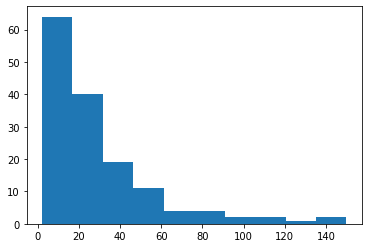

In [61]:
plt.hist(bollywood_df['Budget'])

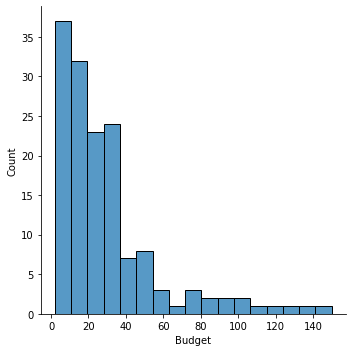

In [65]:
sn.displot(bollywood_df['Budget'])

as per plot interpretion most movie are comes under low budget movides. 

Q.9

<ipython-input-73-32219dc757d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(bollywood_df [bollywood_df['Genre']=='Comedy']
<ipython-input-73-32219dc757d7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(bollywood_df[bollywood_df['Genre']==" Drama "]


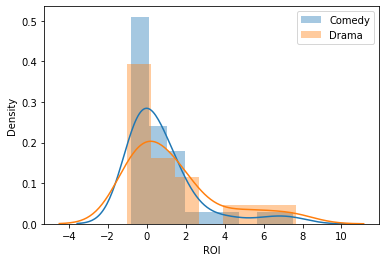

In [73]:
sn.distplot(bollywood_df [bollywood_df['Genre']=='Comedy']
           ['ROI'],
           label="Comedy")
sn.distplot(bollywood_df[bollywood_df['Genre']==" Drama "]
           ['ROI'],
           label="Drama");
plt.legend();

as we can see comedy genre have higher ROI compare with Drama

Q.10
to solve this Question we can use regplot() of seabon.

<AxesSubplot: xlabel='BoxOfficeCollection', ylabel='YoutubeLikes'>

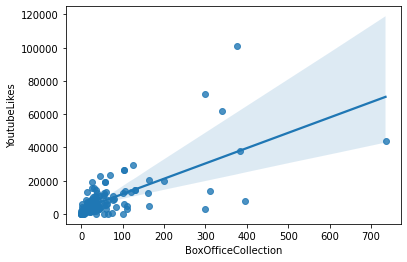

In [74]:
sn.regplot(x='BoxOfficeCollection',
          y='YoutubeLikes',
          data=bollywood_df)

as we can see on above graph, there is a positive relationship between Box office collection and youtube likes. 

In [ ]:
Q.11

<AxesSubplot: xlabel='Genre', ylabel='YoutubeLikes'>

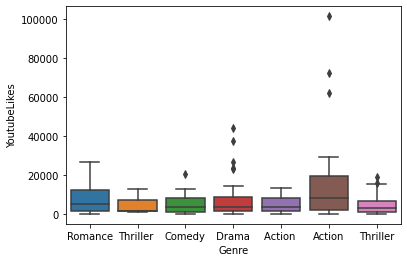

In [75]:
sn.boxplot(x='Genre',
          y='YoutubeLikes',
          data=bollywood_df)

In [ ]:
As per above diagram we can see Action Genre has more youtube likes.

In [ ]:
Q.No12.

In [77]:
influential_variable=['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']

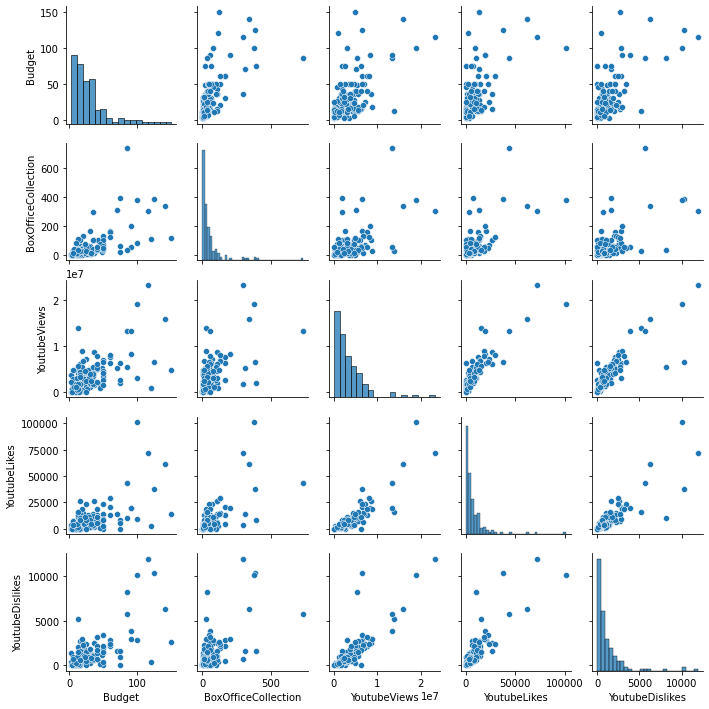

In [79]:
sn.pairplot(bollywood_df[influential_variable],height=2)